In [ ]:
!pip3 install roboticstoolbox-python
!pip3 install roboticstoolbox-python[optionlist]
!pip3 install numpy==1.26.4
!pip3 install matplotlib==3.4.3
!pip3 install opencv-python==4.11.0.86
!pip3 install imageio==2.37.0


如果运行缺少依赖，可以通过我的requirement.txt文件进行pip安装，它是我成功运行时的pip list

最后一个代码块报错可忽视，正常情况下报错了也能保存panda1.gif

/home/suzumiyaharuhi/anaconda3/envs/RV/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 32418 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/suzumiyaharuhi/anaconda3/envs/RV/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 33394 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/suzumiyaharuhi/anaconda3/envs/RV/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 38271 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/suzumiyaharuhi/anaconda3/envs/RV/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 26041 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/suzumiyaharuhi/anaconda3/envs/RV/lib/python3.10/site-packages/matplotlib/backends/backend_agg.py:240: RuntimeWarning: Glyph 22359 missing from current font.
  font.set_text(s, 0.0, flags=flags)


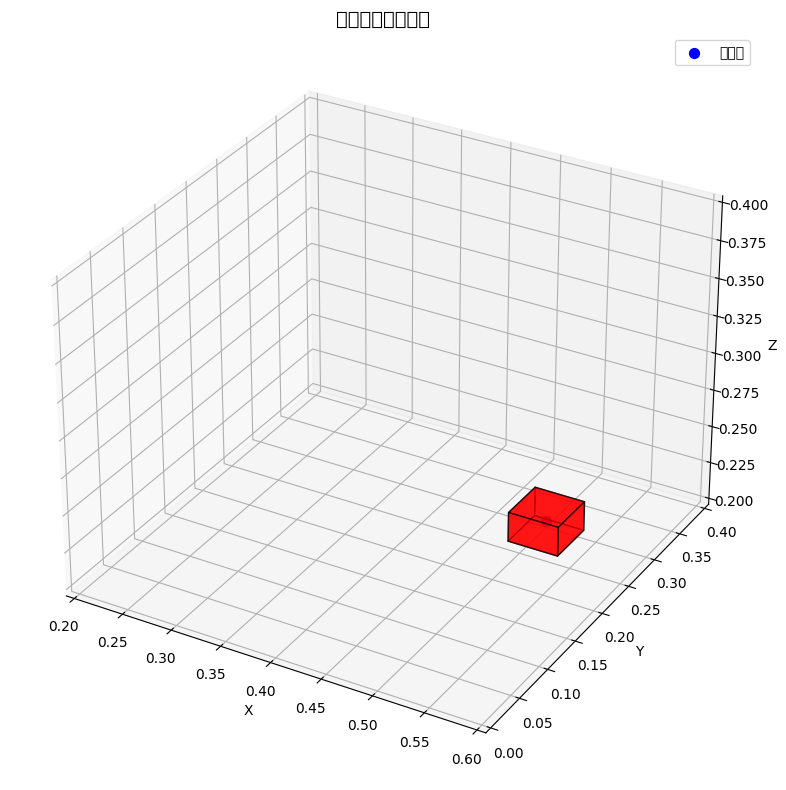

长方块顶点坐标:
顶点 1: (0.475, 0.275, 0.190)
顶点 2: (0.525, 0.275, 0.190)
顶点 3: (0.525, 0.325, 0.190)
顶点 4: (0.475, 0.325, 0.190)
顶点 5: (0.475, 0.275, 0.210)
顶点 6: (0.525, 0.275, 0.210)
顶点 7: (0.525, 0.325, 0.210)
顶点 8: (0.475, 0.325, 0.210)


In [1]:
# %% 模块1: 创建并可视化红色长方块
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection

# 定义长方块的位置和尺寸
block_center = np.array([0.5, 0.3, 0.2])  # 中心位置 (x, y, z)
block_size = np.array([0.05, 0.05, 0.02])   # 尺寸 (长, 宽, 高)

# 计算长方块的8个顶点
def create_block_vertices(center, size):
    """创建长方块的8个顶点坐标"""
    half_size = size / 2
    vertices = np.array([
        [center[0] - half_size[0], center[1] - half_size[1], center[2] - half_size[2]],  # 左下后
        [center[0] + half_size[0], center[1] - half_size[1], center[2] - half_size[2]],  # 右下后
        [center[0] + half_size[0], center[1] + half_size[1], center[2] - half_size[2]],  # 右前下
        [center[0] - half_size[0], center[1] + half_size[1], center[2] - half_size[2]],  # 左前下
        [center[0] - half_size[0], center[1] - half_size[1], center[2] + half_size[2]],  # 左下前
        [center[0] + half_size[0], center[1] - half_size[1], center[2] + half_size[2]],  # 右下前
        [center[0] + half_size[0], center[1] + half_size[1], center[2] + half_size[2]],  # 右前上
        [center[0] - half_size[0], center[1] + half_size[1], center[2] + half_size[2]]   # 左前上
    ])
    return vertices

# 创建长方块的面
def create_block_faces(vertices):
    """定义长方块的6个面"""
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # 底面
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # 顶面
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # 后面
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # 前面
        [vertices[0], vertices[3], vertices[7], vertices[4]],  # 左面
        [vertices[1], vertices[2], vertices[6], vertices[5]]   # 右面
    ]
    return faces

# 创建长方块
vertices = create_block_vertices(block_center, block_size)
faces = create_block_faces(vertices)

# 可视化
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

# 绘制红色长方块
block = Poly3DCollection(faces, alpha=0.7, linewidths=1, edgecolor='k')
block.set_facecolor('red')
ax.add_collection3d(block)

# 设置坐标轴
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_xlim([0.2, 0.6])
ax.set_ylim([0.0, 0.4])
ax.set_zlim([0.2, 0.4])
ax.set_title('红色长方块可视化', fontsize=14)

# 添加坐标网格
ax.grid(True)

# 显示中心点
ax.scatter(block_center[0], block_center[1], block_center[2], c='blue', s=50, label='中心点')
ax.legend()

# 显示
plt.tight_layout()
plt.show()

# 输出顶点坐标
print("长方块顶点坐标:")
for i, vertex in enumerate(vertices):
    print(f"顶点 {i+1}: ({vertex[0]:.3f}, {vertex[1]:.3f}, {vertex[2]:.3f})")

In [ ]:
# %% 模块2: 动态 3D 重建与 GIF 动图生成
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d.art3d import Poly3DCollection
import cv2
import imageio.v3 as iio # 确保这个库已经安装

# --- 全局绘图样式配置 ---
# 设置所有图表统一的字体和字体大小
plt.rcParams['font.family'] = 'DejaVu Sans'
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

# --- 沿用模块1的长方体定义 ---
# 定义长方体的尺寸 (位置会随时间变化)
block_size = np.array([0.05, 0.05, 0.02])

# 计算长方体8个顶点的函数
def create_block_vertices(center, size):
    """创建长方体的8个顶点坐标"""
    half_size = size / 2
    vertices = np.array([
        [center[0] - half_size[0], center[1] - half_size[1], center[2] - half_size[2]],  # 左下后
        [center[0] + half_size[0], center[1] - half_size[1], center[2] - half_size[2]],  # 右下后
        [center[0] + half_size[0], center[1] + half_size[1], center[2] - half_size[2]],  # 右前下
        [center[0] - half_size[0], center[1] + half_size[1], center[2] - half_size[2]],  # 左前下
        [center[0] - half_size[0], center[1] - half_size[1], center[2] + half_size[2]],  # 左下前
        [center[0] + half_size[0], center[1] - half_size[1], center[2] + half_size[2]],  # 右下前
        [center[0] + half_size[0], center[1] + half_size[1], center[2] + half_size[2]],  # 右前上
        [center[0] - half_size[0], center[1] + half_size[1], center[2] + half_size[2]]   # 左前上
    ])
    return vertices

# 定义长方体6个面的函数
def create_block_faces(vertices):
    """定义长方体的6个面"""
    faces = [
        [vertices[0], vertices[1], vertices[2], vertices[3]],  # 底面
        [vertices[4], vertices[5], vertices[6], vertices[7]],  # 顶面
        [vertices[0], vertices[1], vertices[5], vertices[4]],  # 后面
        [vertices[2], vertices[3], vertices[7], vertices[6]],  # 前面
        [vertices[0], vertices[3], vertices[7], vertices[4]],  # 左面
        [vertices[1], vertices[2], vertices[6], vertices[5]]   # 右面
    ]
    return faces

# --- 1. 定义相机参数和位置 (固定不变) ---
# 图像尺寸 (像素)
img_width, img_height = 640, 480

# 相机内参 (K): 假设焦距为 800 像素，主点在图像中心
K = np.array([[800, 0, img_width / 2],
              [0, 800, img_height / 2],
              [0, 0, 1]], dtype=np.float32)

# 计算相机姿态 (R, t) 的函数
def get_camera_pose(camera_pos, look_at_point, up_vector=np.array([0, 0, 1])):
    """
    计算相机的旋转矩阵 R 和平移向量 t。
    camera_pos: 相机在世界坐标系中的位置。
    look_at_point: 相机看向的点 (通常是目标物体)。
    up_vector: 定义相机向上方向的向量。
    """
    z_axis = look_at_point - camera_pos
    z_axis = z_axis / np.linalg.norm(z_axis)

    x_axis = np.cross(up_vector, z_axis)
    x_axis = x_axis / np.linalg.norm(x_axis)

    y_axis = np.cross(z_axis, x_axis)
    y_axis = y_axis / np.linalg.norm(y_axis)

    R_world_to_cam = np.vstack((x_axis, y_axis, z_axis))
    t_world_to_cam = -R_world_to_cam @ camera_pos

    return R_world_to_cam, t_world_to_cam.reshape(3,1)

# 定义三个相机，它们的初始焦点是长方体的一个典型位置
initial_block_center_for_camera_aim = np.array([0.5, 0.3, 0.2])

camera_params = [] # 存储每个相机的 K, R, t, 投影矩阵 P, 和 2D 投影点

# 相机1: 位于长方体正前方偏左上
cam1_pos = np.array([0.5, 0.0, 0.3])
R1, t1 = get_camera_pose(cam1_pos, initial_block_center_for_camera_aim)
P1 = K @ np.hstack((R1, t1))
camera_params.append({'name': 'Camera 1 (Front-Left)', 'K': K, 'R': R1, 't': t1, 'P': P1, 'pos': cam1_pos})

# 相机2: 位于长方体右后方
cam2_pos = np.array([0.6, 0.4, 0.25])
R2, t2 = get_camera_pose(cam2_pos, initial_block_center_for_camera_aim)
P2 = K @ np.hstack((R2, t2))
camera_params.append({'name': 'Camera 2 (Back-Right)', 'K': K, 'R': R2, 't': t2, 'P': P2, 'pos': cam2_pos})

# 相机3: 位于长方体上方
cam3_pos = np.array([0.5, 0.2, 0.5])
R3, t3 = get_camera_pose(cam3_pos, initial_block_center_for_camera_aim)
P3 = K @ np.hstack((R3, t3))
camera_params.append({'name': 'Camera 3 (Top)', 'K': K, 'R': R3, 't': t3, 'P': P3, 'pos': cam3_pos})

# --- 2. 生成 2D 投影并进行 3D 重建 (动画帧循环) ---
num_frames = 50  # 动画帧数
x_amplitude = 0.1 # X轴振幅
y_amplitude = 0.1 # Y轴振幅
z_amplitude = 0.05 # Z轴振幅
angular_frequency = 0.1 # 角频率，控制运动速度

# 创建列表来存储每个相机视图和全局视图的帧
camera_view_frames = [[] for _ in range(len(camera_params))]
global_view_frames = []

for frame_num in range(num_frames):
    # 计算当前帧长方体的中心位置 (正弦曲线路径)
    t = frame_num * angular_frequency
    current_block_center = np.array([
        0.5 + x_amplitude * np.sin(t),
        0.3 + y_amplitude * np.cos(t),
        0.2 + z_amplitude * np.sin(2 * t) # Z轴使用不同的频率，增加曲线的复杂性
    ])
    block_vertices_3d = create_block_vertices(current_block_center, block_size)

    all_image_points = []
    all_projection_matrices = []

    # --- 每个相机的 2D 投影 ---
    fig_projections, axes_projections = plt.subplots(1, len(camera_params), figsize=(5 * len(camera_params), 5))
    # 确保 axes_projections 总是可迭代的
    if len(camera_params) == 1:
        axes_projections = [axes_projections]

    for i, cam in enumerate(camera_params):
        # 更新相机外参，使其始终看向当前长方体中心
        R, t_vec = get_camera_pose(cam['pos'], current_block_center)
        P = cam['K'] @ np.hstack((R, t_vec)) # 使用cam['K']以确保K矩阵是正确的
        cam['P'] = P  # 更新投影矩阵

        # 将 3D 顶点投影到 2D 图像平面
        image_points_2d = []
        for vertex_3d in block_vertices_3d:
            point_3d_homogeneous = np.append(vertex_3d, 1.0).reshape(4, 1)
            projected_point_homogeneous = cam['P'] @ point_3d_homogeneous
            # 归一化齐次坐标得到像素坐标
            u = int(projected_point_homogeneous[0] / projected_point_homogeneous[2])
            v = int(projected_point_homogeneous[1] / projected_point_homogeneous[2])
            image_points_2d.append([u, v])
import numpy as np
import matplotlib.pyplot as plt
from roboticstoolbox.models import Panda
import roboticstoolbox as rtb
from spatialmath import SE3
from mpl_toolkits.mplot3d import art3d # 导入 art3d 模块
import imageio # 用于将图片合成为GIF
import os # 用于文件操作

# 定义长方块的位置和尺寸
block_center = np.array([0.5, 0.3, 0.2])  # 中心位置 (x, y, z)
block_size = np.array([0.05, 0.05, 0.02])    # 尺寸 (长, 宽, 高)

# 创建机器人模型
robot = Panda()

# 定义起点和终点的关节配置
q_start = robot.qr

# 使用逆运动学计算终点配置
Tep = SE3.Trans(block_center[0], block_center[1], block_center[2] + block_size[2]/2 + 0.1) * SE3.OA([0, 1, 0], [0, 0, -1])
sol_tuple = robot.ik_LM(Tep)

if sol_tuple[1] and not np.any(np.isnan(sol_tuple[0])):
    q_end = sol_tuple[0]
else:
    print("逆运动学未能找到有效解或解包含 NaN，使用默认终点关节配置。")
    q_end = robot.qr + np.array([0.1, -0.1, 0.1, -0.1, 0.1, -0.1, 0.1])

# 生成关节轨迹
qt = rtb.jtraj(q_start, q_end, 50) # 50 帧

def plot_cuboid(ax, center, size, color='red', alpha=0.8):
    x, y, z = center
    dx, dy, dz = size

    x_min, x_max = x - dx/2, x + dx/2
    y_min, y_max = y - dy/2, y + dy/2
    z_min, z_max = z - dz/2, z + dz/2

    verts = np.array([
        [x_min, y_min, z_min], [x_max, y_min, z_min], [x_max, y_max, z_min], [x_min, y_max, z_min], # bottom
        [x_min, y_min, z_max], [x_max, y_min, z_max], [x_max, y_max, z_max], [x_min, y_max, z_max]  # top
    ])

    faces = [
        [verts[0], verts[1], verts[2], verts[3]], # bottom
        [verts[4], verts[5], verts[6], verts[7]], # top
        [verts[0], verts[1], verts[5], verts[4]], # front
        [verts[2], verts[3], verts[7], verts[6]], # back
        [verts[1], verts[2], verts[6], verts[5]], # right
        [verts[0], verts[3], verts[7], verts[4]]  # left
    ]
    # 使用 art3d.Poly3DCollection
    poly_collection = ax.add_collection3d(art3d.Poly3DCollection(faces, facecolors=color, linewidths=1, edgecolors='k', alpha=alpha))
    return poly_collection

# 创建图形和 3D 轴，并设置一次
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')
ax.set_xlim([-1, 1])
ax.set_ylim([-1, 1])
ax.set_zlim([0, 1.5])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
ax.set_title('Panda Robot Trajectory with Block')

# 用于存储每帧图像的列表
frames = []
# 用于存储临时图像文件的目录
temp_dir = 'temp_frames'
if not os.path.exists(temp_dir):
    os.makedirs(temp_dir)

print("正在生成动画帧...")
for i in range(qt.q.shape[0]):
    ax.cla() # 清除轴内容，这会清除所有艺术家对象
    ax.set_xlim([-1, 1]) # 每次cla()后需要重新设置轴范围
    ax.set_ylim([-1, 1])
    ax.set_zlim([0, 1.5])
    ax.set_xlabel('X')
    ax.set_ylabel('Y')
    ax.set_zlabel('Z')
    ax.set_title('Panda Robot Trajectory with Block')

    # 绘制长方体
    plot_cuboid(ax, block_center, block_size, color='red')

    # 绘制机器人当前帧
    robot.plot(qt.q[i, :], ax=ax, color='blue', block=False) # block=False 防止阻塞

    # 保存当前帧为图片
    frame_filename = os.path.join(temp_dir, f'frame_{i:04d}.png')
    plt.savefig(frame_filename, dpi=100) # 保存为PNG图片
    frames.append(frame_filename)

print(f"共生成 {len(frames)} 帧图片。")

# 使用 imageio 将图片合成为 GIF
gif_filename = 'panda_with_block_manual.gif'
print(f"正在将图片合成为 GIF: {gif_filename}...")
with imageio.get_writer(gif_filename, mode='I', fps=20) as writer: # fps控制GIF播放速度
    for filename in frames:
        image = imageio.imread(filename)
        writer.append_data(image)
print("GIF 合成完成。")

# 清理临时文件
print("正在清理临时文件...")
for filename in frames:
    os.remove(filename)
os.rmdir(temp_dir)
print("临时文件清理完成。")

plt.close(fig) # 关闭图形，释放内存  # 垂直边
        ]
        for start_idx, end_idx in edges:
            p1 = image_points_2d[start_idx]
            p2 = image_points_2d[end_idx]
            ax.plot([p1[0], p2[0]], [p1[1], p2[1]], 'lime', linestyle='-', linewidth=2)

        ax.set_title(f"{cam['name']} View")
        ax.set_xlim(0, img_width)
        ax.set_ylim(img_height, 0) # Y轴反向，符合图像坐标系
        ax.set_aspect('equal')
        ax.axis('off') # 不显示坐标轴刻度
        ax.legend(loc='lower right')

        # 将当前帧保存到列表中
        fig_projections.canvas.draw()
        # 从 Matplotlib 画布中获取图像数据
        image_data_rgba = np.array(fig_projections.canvas.renderer.buffer_rgba())
        # imageio 通常需要 RGB 格式，所以去掉 alpha 通道
        camera_view_frames[i].append(image_data_rgba[:, :, :3])

        all_image_points.append(image_points_2d.T)
        all_projection_matrices.append(cam['P'])
    plt.close(fig_projections) # 关闭图形以释放内存

    # --- 3D 重建 (使用前两个相机的投影) ---
    if len(all_image_points) >= 2:
        # 确保数据类型正确
        points1_for_triang = all_image_points[0].astype(np.float32)
        points2_for_triang = all_image_points[1].astype(np.float32)
        P1_for_triang = all_projection_matrices[0].astype(np.float32)
        P2_for_triang = all_projection_matrices[1].astype(np.float32)

        # 使用 OpenCV 进行三维重建
        reconstructed_points_homogeneous = cv2.triangulatePoints(P1_for_triang, P2_for_triang,
                                                                   points1_for_triang, points2_for_triang)
        # 将齐次坐标转换为非齐次坐标
        reconstructed_points_3d = reconstructed_points_homogeneous[:3] / reconstructed_points_homogeneous[3]
        reconstructed_points_3d = reconstructed_points_3d.T # 转换为 Nx3 格式

        # 计算重建长方体的中心位置
        reconstructed_block_center = np.mean(reconstructed_points_3d, axis=0)

        # --- 全局 3D 视图可视化 ---
        fig_global = plt.figure(figsize=(12, 10))
        ax_global = fig_global.add_subplot(111, projection='3d')

        # 绘制原始红色长方体
        original_faces = create_block_faces(block_vertices_3d)
        original_block = Poly3DCollection(original_faces, alpha=0.3, linewidths=1, edgecolor='r')
        original_block.set_facecolor('red')
        ax_global.add_collection3d(original_block)
        ax_global.scatter(current_block_center[0], current_block_center[1], current_block_center[2], c='red', s=100,
                          marker='o', label='Original Center')

        # 绘制重建的长方体中心
        ax_global.scatter(reconstructed_block_center[0], reconstructed_block_center[1], reconstructed_block_center[2],
                          c='blue', s=100, marker='x', label='Reconstructed Center')

        # 绘制重建的顶点
        ax_global.scatter(reconstructed_points_3d[:, 0], reconstructed_points_3d[:, 1], reconstructed_points_3d[:, 2],
                          c='blue', s=30, alpha=0.6, label='Reconstructed Vertices')

        # 绘制相机位置和简化视锥
        for cam in camera_params:
            ax_global.scatter(cam['pos'][0], cam['pos'][1], cam['pos'][2], c='green', s=80, marker='^',
                              label=cam['name'].split('(')[0].strip() + ' Position')
            # 从相机位置到长方体中心的连线 (简化视锥/视线方向)
            ax_global.plot([cam['pos'][0], current_block_center[0]],
                           [cam['pos'][1], current_block_center[1]],
                           [cam['pos'][2], current_block_center[2]], 'g--', alpha=0.5)

        # 设置坐标轴范围，确保物体始终在视野内
        ax_global.set_xlabel('X-axis')
        ax_global.set_ylabel('Y-axis')
        ax_global.set_zlabel('Z-axis')
        ax_global.set_xlim([0.2, 0.8])
        ax_global.set_ylim([0.0, 0.6])
        ax_global.set_zlim([0.0, 0.6])
        ax_global.set_title('Global 3D View: Original Cuboid, Cameras, and Reconstructed Center')
        ax_global.grid(True)
        ax_global.legend()

        # 调整视角以获得更好的动画效果
        ax_global.view_init(elev=20, azim=frame_num * 360 / num_frames) # 旋转全局视图

        # 将当前帧保存到列表中
        fig_global.canvas.draw()
        image_data_rgba = np.array(fig_global.canvas.renderer.buffer_rgba())
        global_view_frames.append(image_data_rgba[:, :, :3])
        plt.close(fig_global) # 关闭图形以释放内存

    else:
        print(f"\n跳过帧 {frame_num}: 至少需要两个相机才能进行三维重建。")

# --- 将帧保存为 GIF ---
print("\n正在生成 GIF 动画，这可能需要一些时间...")
for i, frames in enumerate(camera_view_frames):
    output_file = f"camera_{i+1}_view.gif"
    iio.imwrite(output_file, frames, duration=100) # duration 是每帧持续时间（毫秒）

iio.imwrite("global_view.gif", global_view_frames, duration=100)

print("\nGIF 动画已生成：")
print("- camera_1_view.gif")
print("- camera_2_view.gif")
print("- camera_3_view.gif")
print("- global_view.gif")
print("\n请检查代码运行目录以找到这些 GIF 文件。")


/tmp/ipykernel_6882/3255608430.py:146: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  u = int(projected_point_homogeneous[0] / projected_point_homogeneous[2])
/tmp/ipykernel_6882/3255608430.py:147: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  v = int(projected_point_homogeneous[1] / projected_point_homogeneous[2])



正在生成 GIF 动画，这可能需要一些时间...

GIF 动画已生成：
- camera_1_view.gif
- camera_2_view.gif
- camera_3_view.gif
- global_view.gif

请检查代码运行目录以找到这些 GIF 文件。


In [3]:
import roboticstoolbox as rtb
robot = rtb.models.Panda()
print(robot)
Te = robot.fkine(robot.qr)  # forward kinematics
print(Te)

ERobot: panda (by Franka Emika), 7 joints (RRRRRRR), 1 gripper, geometry, collision
┌──────┬──────────────┬───────┬─────────────┬────────────────────────────────────────────────┐
│ link │     link     │ joint │   parent    │              ETS: parent to link               │
├──────┼──────────────┼───────┼─────────────┼────────────────────────────────────────────────┤
│    0 │ panda_link0  │       │ BASE        │ SE3()                                          │
│    1 │ panda_link1  │     0 │ panda_link0 │ SE3(0, 0, 0.333) ⊕ Rz(q0)                      │
│    2 │ panda_link2  │     1 │ panda_link1 │ SE3(-90°, -0°, 0°) ⊕ Rz(q1)                    │
│    3 │ panda_link3  │     2 │ panda_link2 │ SE3(0, -0.316, 0; 90°, -0°, 0°) ⊕ Rz(q2)       │
│    4 │ panda_link4  │     3 │ panda_link3 │ SE3(0.0825, 0, 0; 90°, -0°, 0°) ⊕ Rz(q3)       │
│    5 │ panda_link5  │     4 │ panda_link4 │ SE3(-0.0825, 0.384, 0; -90°, -0°, 0°) ⊕ Rz(q4) │
│    6 │ panda_link6  │     5 │ panda_link5 │ SE3(90°, -0°, 0

(array([ 2.39773557, -1.18417858, -1.55954706, -2.23507328, -1.2543483 ,
        1.79695744, -0.89901221]), 1, 16, 2, 8.514107029400285e-10)
  -1        -2.094e-06  3.742e-05  0.4019    
  -2.094e-06  1        -1.572e-05  0.3188    
  -3.742e-05 -1.572e-05 -1         0.1815    
   0         0         0         1         



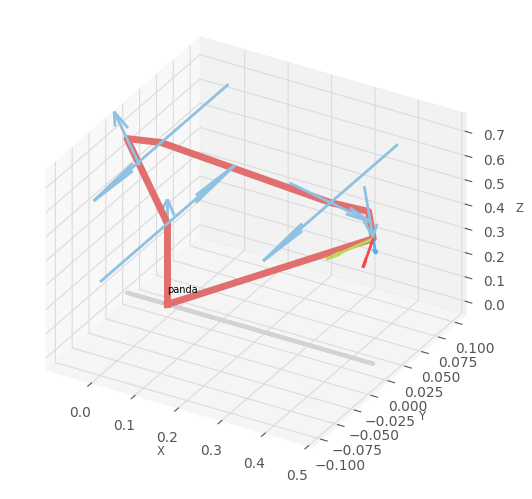

<Figure size 640x480 with 0 Axes>

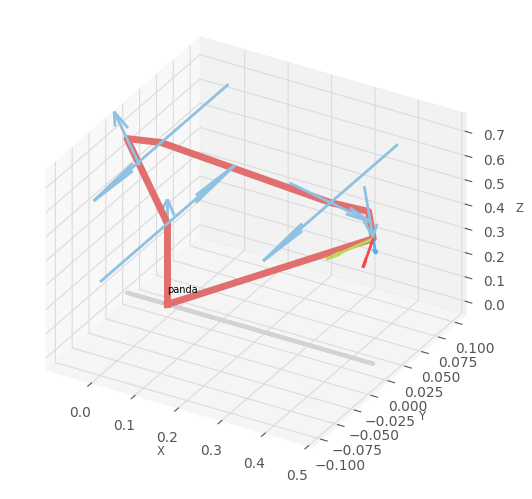

<Figure size 640x480 with 0 Axes>

In [4]:
from roboticstoolbox import *
import roboticstoolbox as rtb
from spatialmath import SE3
import matplotlib.pyplot as plt

# 定义机器人的目标位姿
Tep = SE3.Trans(reconstructed_block_center[0], reconstructed_block_center[1], reconstructed_block_center[2]) * SE3.OA([0, 1, 0], [0, 0, -1])

# 定义机器人模型
robot = rtb.models.Panda()

# 解决逆运动学问题
sol = robot.ik_LM(Tep)  # 解决IK
print(sol)

# 获取解中的第一个解
q_pickup = sol[0]

# 打印正运动学结果，验证目标位姿是否达到
print(robot.fkine(q_pickup))

# 生成轨迹
qt = rtb.jtraj(robot.qr, q_pickup, 50)
robot.plot(qt.q, backend='pyplot', movie='panda1.gif')
# 绘制轨迹
robot.plot(qt.q, backend='pyplot')

plt.show()

----------------------------------------
Exception occurred during processing of request from ('127.0.0.1', 57650)
Traceback (most recent call last):
  File "/home/suzumiyaharuhi/anaconda3/envs/RV/lib/python3.10/socketserver.py", line 316, in _handle_request_noblock
    self.process_request(request, client_address)
  File "/home/suzumiyaharuhi/anaconda3/envs/RV/lib/python3.10/socketserver.py", line 347, in process_request
    self.finish_request(request, client_address)
  File "/home/suzumiyaharuhi/anaconda3/envs/RV/lib/python3.10/socketserver.py", line 360, in finish_request
    self.RequestHandlerClass(request, client_address, self)
  File "/home/suzumiyaharuhi/anaconda3/envs/RV/lib/python3.10/site-packages/swift/SwiftRoute.py", line 343, in __init__
    super(MyHttpRequestHandler, self).__init__(
  File "/home/suzumiyaharuhi/anaconda3/envs/RV/lib/python3.10/http/server.py", line 668, in __init__
    super().__init__(*args, **kwargs)
  File "/home/suzumiyaharuhi/anaconda3/envs/RV/lib

IndexError: list index out of range

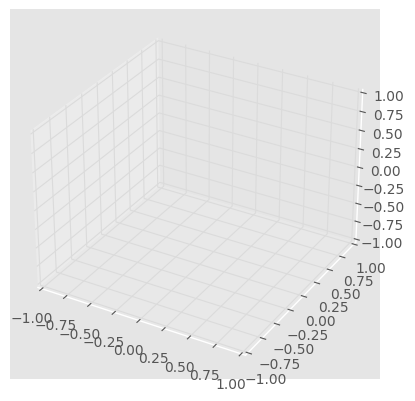

In [5]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from roboticstoolbox.models import Panda
import roboticstoolbox as rtb
import asyncio
import nest_asyncio

# 应用 nest_asyncio 以允许嵌套事件循环
nest_asyncio.apply()

# 创建机器人模型
robot = Panda()

# 定义起点和终点的关节配置
q_start = robot.qr  # 初始关节配置
q_end = robot.qr + np.array([0.1, -0.1, 0.1, -0.1, 0.1, -0.1, 0.1])  # 终点关节配置

# 生成关节轨迹
qt = rtb.jtraj(q_start, q_end, 50)

# 创建图形和 3D 轴
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# 设置轴的范围
ax.set_xlim(-1, 1)
ax.set_ylim(-1, 1)
ax.set_zlim(-1, 1)

# 初始化机器人图形
robot_artists = []

def init():
    global robot_artists
    robot_artists = robot.plot(qt.q[0, :], ax=ax, color='blue')
    return robot_artists

def update(frame):
    global robot_artists
    # 清除之前的图形
    for artist in robot_artists:
        artist.remove()
    # 绘制新的机器人图形
    robot_artists = robot.plot(qt.q[frame, :], ax=ax, color='blue')
    return robot_artists

# 创建动画
ani = FuncAnimation(fig, update, frames=qt.q.shape[0], init_func=init, blit=False)

# 保存为 GIF
ani.save('panda1.gif', writer='pillow')

plt.close()